# Predicción del precio de alquiler de la vivienda en la ciudad de Barcelona

**El ejercicio tiene múltiples soluciones distintas y válidas**

Descripción del dataset:

|Columna|Descripción|Key|
|--|--|--|
|id|Identificador numérico de la vivienda||
|price|Precio de mercado de la vivienda||
|currency|Moneda|Euros / Mes|
|latitude|Latitud de las coordenadas geográficas de la vivienda||
|longitude|Longitud de las coordenadas geográficas de la vivienda||
|sq_meters|Metros cuadrados de la vivienda||
|sq_meters_built|Metros cuadrados construídos de la vivienda||
|rooms|Número de habitaciones||
|bathrooms|Número de baños||
|balcony|Indicador si la vivienda tiene balcón|1, 0|
|terrace|Indicador si la vivienda tiene terraza|1, 0|
|exterior|Indicador si la vivienda tiene una orientación exterior o interior en el edificio|1, 0|
|orientation|Orientación principal de la vivienda|norte, sur, este, oeste|
|floor|Piso de la vivienda||
|rooftop|Indicador si la vivienda es un ático|1, 0|
|elevator|Indicador si el edificio de la vivienda tiene ascensor|1, 0|
|doorman|Indicador si el edificio tiene portero|1,0|
|pool|Indicador si la vivienda cuenta con piscina o derecho de uso de piscina|1,0|
|ac|Indicador si tiene aire acondicionado|1,0|
|heating|Indicador si tiene calefacción|bomba, electric, gas, individual|
|year_built|Año de construcción||
|quality|Indicador de calidad de la vivienda|2 - En buen estado|
|city|Ciudad de la vivienda||
|neighborhood|Barrio de la vivienda||
|dist_city_center|Distancia en kilómetros al centro de la ciudad||
|furniture|Indicador si la vivienda cuenta con mobiliario|1: Sin Equipar; 2: Cocina Equipada; 3: Amueblado|
|garage|Indicador si la vivienda tiene garage|1, 0|
|property_type|Tipo de vivienda||
|garden|Indicador si la vivienda cuenta con jardín|1,0|
|closest_station|Nombre de la estación de metro más cercana||
|dist_closest_station|Distancia en kilómetros a la estación de metro más cercana||
|created_at|Fecha de creación del anuncio||
|last_seen|Fecha última en la que el anuncio fue publicado en la web||



# Barcelona Housing Market

#### Carga de librerías y dataset

In [14]:

# Library load
import pandas as pd
import numpy as np

# Plotting library
import seaborn as sn
import matplotlib.pyplot as plt

# Funciones para hacer cálculo estadístico

# sklearn packages
from sklearn.preprocessing import StandardScaler # Escalamiento de los datos
from sklearn.decomposition import PCA # Para hacer un PCA
from sklearn.pipeline import make_pipeline # Para hacer pipelines
from sklearn import metrics # Calcula métricas para un modelo
from sklearn.tree import DecisionTreeRegressor # Generación de modelos de decision tree
from sklearn.ensemble import BaggingRegressor # Generación de modelos de bagging
from sklearn.ensemble import RandomForestRegressor # Generación de modelo de random forest
from sklearn.ensemble import StackingRegressor # Generación de modelos de Stacking
from sklearn.model_selection import train_test_split # Hace split entre training y testing
from sklearn.model_selection import cross_validate # trains model with cross validation
from sklearn.model_selection import GridSearchCV # Optimización de hiperparámetros para un modelo
from sklearn.preprocessing import OneHotEncoder # One Hot encoding de las variables categóricas

# Catboost packages
import catboost as cat

# Representaciones Shap Values
#import shap
# print the JS visualization code to the notebook 
#shap.initjs()

# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore') #ignora los errores en el notebook



# Modelo de Bagging

---

### Exploratory Data Analysis

En éste punto queremos entender qué datos tenemos disponibles. Para ello realizaremos los siguientes puntos:

- Estadística descriptiva y calidad general de los datos: ¿Debemos hacer limpieza de los datos?, ¿Nos sirven todas las columnas?, ¿Nos sirven todas las instancias?, ¿Cómo debemos tratar los null values?
- Visualizaciones y análisis que ayuden a entender la distribución de las variables continuas y categorías independientemente: ¿Qué distribuciones siguen las variables continuas?, ¿Qué proporción de instancias tenemos para las variables categóricas?
- Visualizaciones y análisis que ayuden a entender la relación entre los atributos y la variable objetivo price: ¿Qué relación tienen las variables continuas con la variable objetivo price?, ¿Y las cariables categóricas?
- Alteración y creación de nuevas variables: ¿Podemos generar nuevas variables que se adapten más a nuestro objetivo que las que tenemos actualmente?
- Visualizaciones y análisis que ayuden a entender la posible correlación entre variables: ¿Cómo están relacionadas entre sí las variables interesantes para nuestro dominio?, ¿Debemos tener algún tipo de cuidado al respecto?

**Objetivos de éste punto:**

- Familiarizarnos con el dataset
- Generar un dataframe limpio, con las variables útiles para entrenar los modelos
- Entender qué posibles variables estén correlacionadas para evitar un sobreentrenamiento del modelo

---

In [15]:
raw_data = pd.read_csv('0_processed_renting_Barcelona.csv', delimiter = ',')
raw_data.head()

,id,price,currency,latitude,longitude,sq_meters,sq_meters_built,rooms,bathrooms,balcony,...,neighborhood,dist_city_center,furniture,garage,property_type,garden,closest_station,dist_closest_station,created_at,last_seen
0,536625,850,€/mes,41.401708,2.154077,52.0,55,2,1,NaN,...,Gràcia,2.026455,3.0,NaN,piso,NaN,Fontana,0.094111,9/1/2021 15:58,10/4/2021 6:01
1,545910,725,€/mes,41.407221,2.135569,32.0,37,2,1,1.0,...,Sant Gervasi - La Bonanova,3.582409,NaN,NaN,piso,NaN,Vallcarca,0.902561,9/2/2021 15:24,9/8/2021 12:29
2,570697,950,€/mes,41.411508,2.164608,NaN,72,3,1,NaN,...,El Baix Guinardó,2.663025,3.0,NaN,piso,NaN,Alfons X,0.188177,8/28/2021 23:52,8/28/2021 23:52
3,591588,750,€/mes,41.402256,2.140764,NaN,45,1,1,1.0,...,Sant Gervasi - La Bonanova,2.910067,3.0,NaN,piso,NaN,Lesseps,0.892917,8/29/2021 11:25,9/8/2021 12:29
4,610243,990,€/mes,41.405327,2.146929,NaN,45,1,1,NaN,...,Sarrià-Sant Gervasi,2.727149,3.0,NaN,piso,NaN,Lesseps,0.293784,8/30/2021 13:48,8/30/2021 14:04


In [16]:
print("Proporción de valores nulos (%)")
raw_data.isnull().sum() / len(raw_data) * 100

Proporción de valores nulos (%)


id                        0.000000
price                     0.000000
currency                  0.000000
latitude                  0.000000
longitude                 0.000000
sq_meters                41.578452
sq_meters_built           0.000000
rooms                     0.000000
bathrooms                 0.000000
balcony                  59.009645
terrace                  77.322983
exterior                  7.833451
orientation              56.645495
floor                    23.123971
rooftop                  92.742884
elevator                  3.022818
doorman                 100.000000
pool                     96.224418
ac                       51.940720
heating                  35.638673
year_built               52.881675
quality                   0.000000
city                      0.000000
neighborhood              0.000000
dist_city_center          0.000000
furniture                14.725947
garage                   95.471654
property_type             0.023524
garden              

Retiramos las variables que no nos importan para el modelo

In [17]:
rent_dataset = raw_data[['price', 'sq_meters_built', 'rooms', 'bathrooms', 'balcony', 'terrace', 'exterior', 'orientation', 'floor', 'rooftop', 'elevator', 'pool', 'ac', 'heating', 'year_built', 'neighborhood', 'dist_city_center', 'property_type', 'dist_closest_station', 'furniture']]
rent_dataset.head()

,price,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,pool,ac,heating,year_built,neighborhood,dist_city_center,property_type,dist_closest_station,furniture
0,850,55,2,1,NaN,NaN,1.0,norte,2.0,NaN,0.0,NaN,1.0,NaN,NaN,Gràcia,2.026455,piso,0.094111,3.0
1,725,37,2,1,1.0,NaN,1.0,sur,3.0,NaN,1.0,NaN,1.0,NaN,1962.0,Sant Gervasi - La Bonanova,3.582409,piso,0.902561,NaN
2,950,72,3,1,NaN,NaN,1.0,NaN,4.0,NaN,1.0,NaN,1.0,NaN,NaN,El Baix Guinardó,2.663025,piso,0.188177,3.0
3,750,45,1,1,1.0,NaN,1.0,norte,4.0,NaN,1.0,NaN,NaN,NaN,1936.0,Sant Gervasi - La Bonanova,2.910067,piso,0.892917,3.0
4,990,45,1,1,NaN,NaN,1.0,sur,3.0,NaN,1.0,NaN,NaN,gas,NaN,Sarrià-Sant Gervasi,2.727149,piso,0.293784,3.0


Podemos asumir que para algunas de las variables, los valores nulos son en realidad 0:

In [18]:
features_to_null = ['balcony', 'terrace', 'exterior', 'floor', 'rooftop', 'elevator', 'pool', 'ac']
for i in range(0,len(features_to_null)):
   rent_dataset[features_to_null[i]].fillna(0, inplace = True) 
rent_dataset.head()

,price,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,pool,ac,heating,year_built,neighborhood,dist_city_center,property_type,dist_closest_station,furniture
0,850,55,2,1,0.0,0.0,1.0,norte,2.0,0.0,0.0,0.0,1.0,NaN,NaN,Gràcia,2.026455,piso,0.094111,3.0
1,725,37,2,1,1.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,1.0,NaN,1962.0,Sant Gervasi - La Bonanova,3.582409,piso,0.902561,NaN
2,950,72,3,1,0.0,0.0,1.0,NaN,4.0,0.0,1.0,0.0,1.0,NaN,NaN,El Baix Guinardó,2.663025,piso,0.188177,3.0
3,750,45,1,1,1.0,0.0,1.0,norte,4.0,0.0,1.0,0.0,0.0,NaN,1936.0,Sant Gervasi - La Bonanova,2.910067,piso,0.892917,3.0
4,990,45,1,1,0.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,0.0,gas,NaN,Sarrià-Sant Gervasi,2.727149,piso,0.293784,3.0


Para otras, como por ejemplo la property_age, podemos transformarla a una variable categórica incluyendo los valores nulos como una categoría de unknown:

In [19]:
rent_dataset['property_age'] = 2024 - rent_dataset['year_built']
rent_dataset.head()

,price,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,...,pool,ac,heating,year_built,neighborhood,dist_city_center,property_type,dist_closest_station,furniture,property_age
0,850,55,2,1,0.0,0.0,1.0,norte,2.0,0.0,...,0.0,1.0,NaN,NaN,Gràcia,2.026455,piso,0.094111,3.0,NaN
1,725,37,2,1,1.0,0.0,1.0,sur,3.0,0.0,...,0.0,1.0,NaN,1962.0,Sant Gervasi - La Bonanova,3.582409,piso,0.902561,NaN,62.0
2,950,72,3,1,0.0,0.0,1.0,NaN,4.0,0.0,...,0.0,1.0,NaN,NaN,El Baix Guinardó,2.663025,piso,0.188177,3.0,NaN
3,750,45,1,1,1.0,0.0,1.0,norte,4.0,0.0,...,0.0,0.0,NaN,1936.0,Sant Gervasi - La Bonanova,2.910067,piso,0.892917,3.0,88.0
4,990,45,1,1,0.0,0.0,1.0,sur,3.0,0.0,...,0.0,0.0,gas,NaN,Sarrià-Sant Gervasi,2.727149,piso,0.293784,3.0,NaN


array([[<Axes: title={'center': 'property_age'}>]], dtype=object)

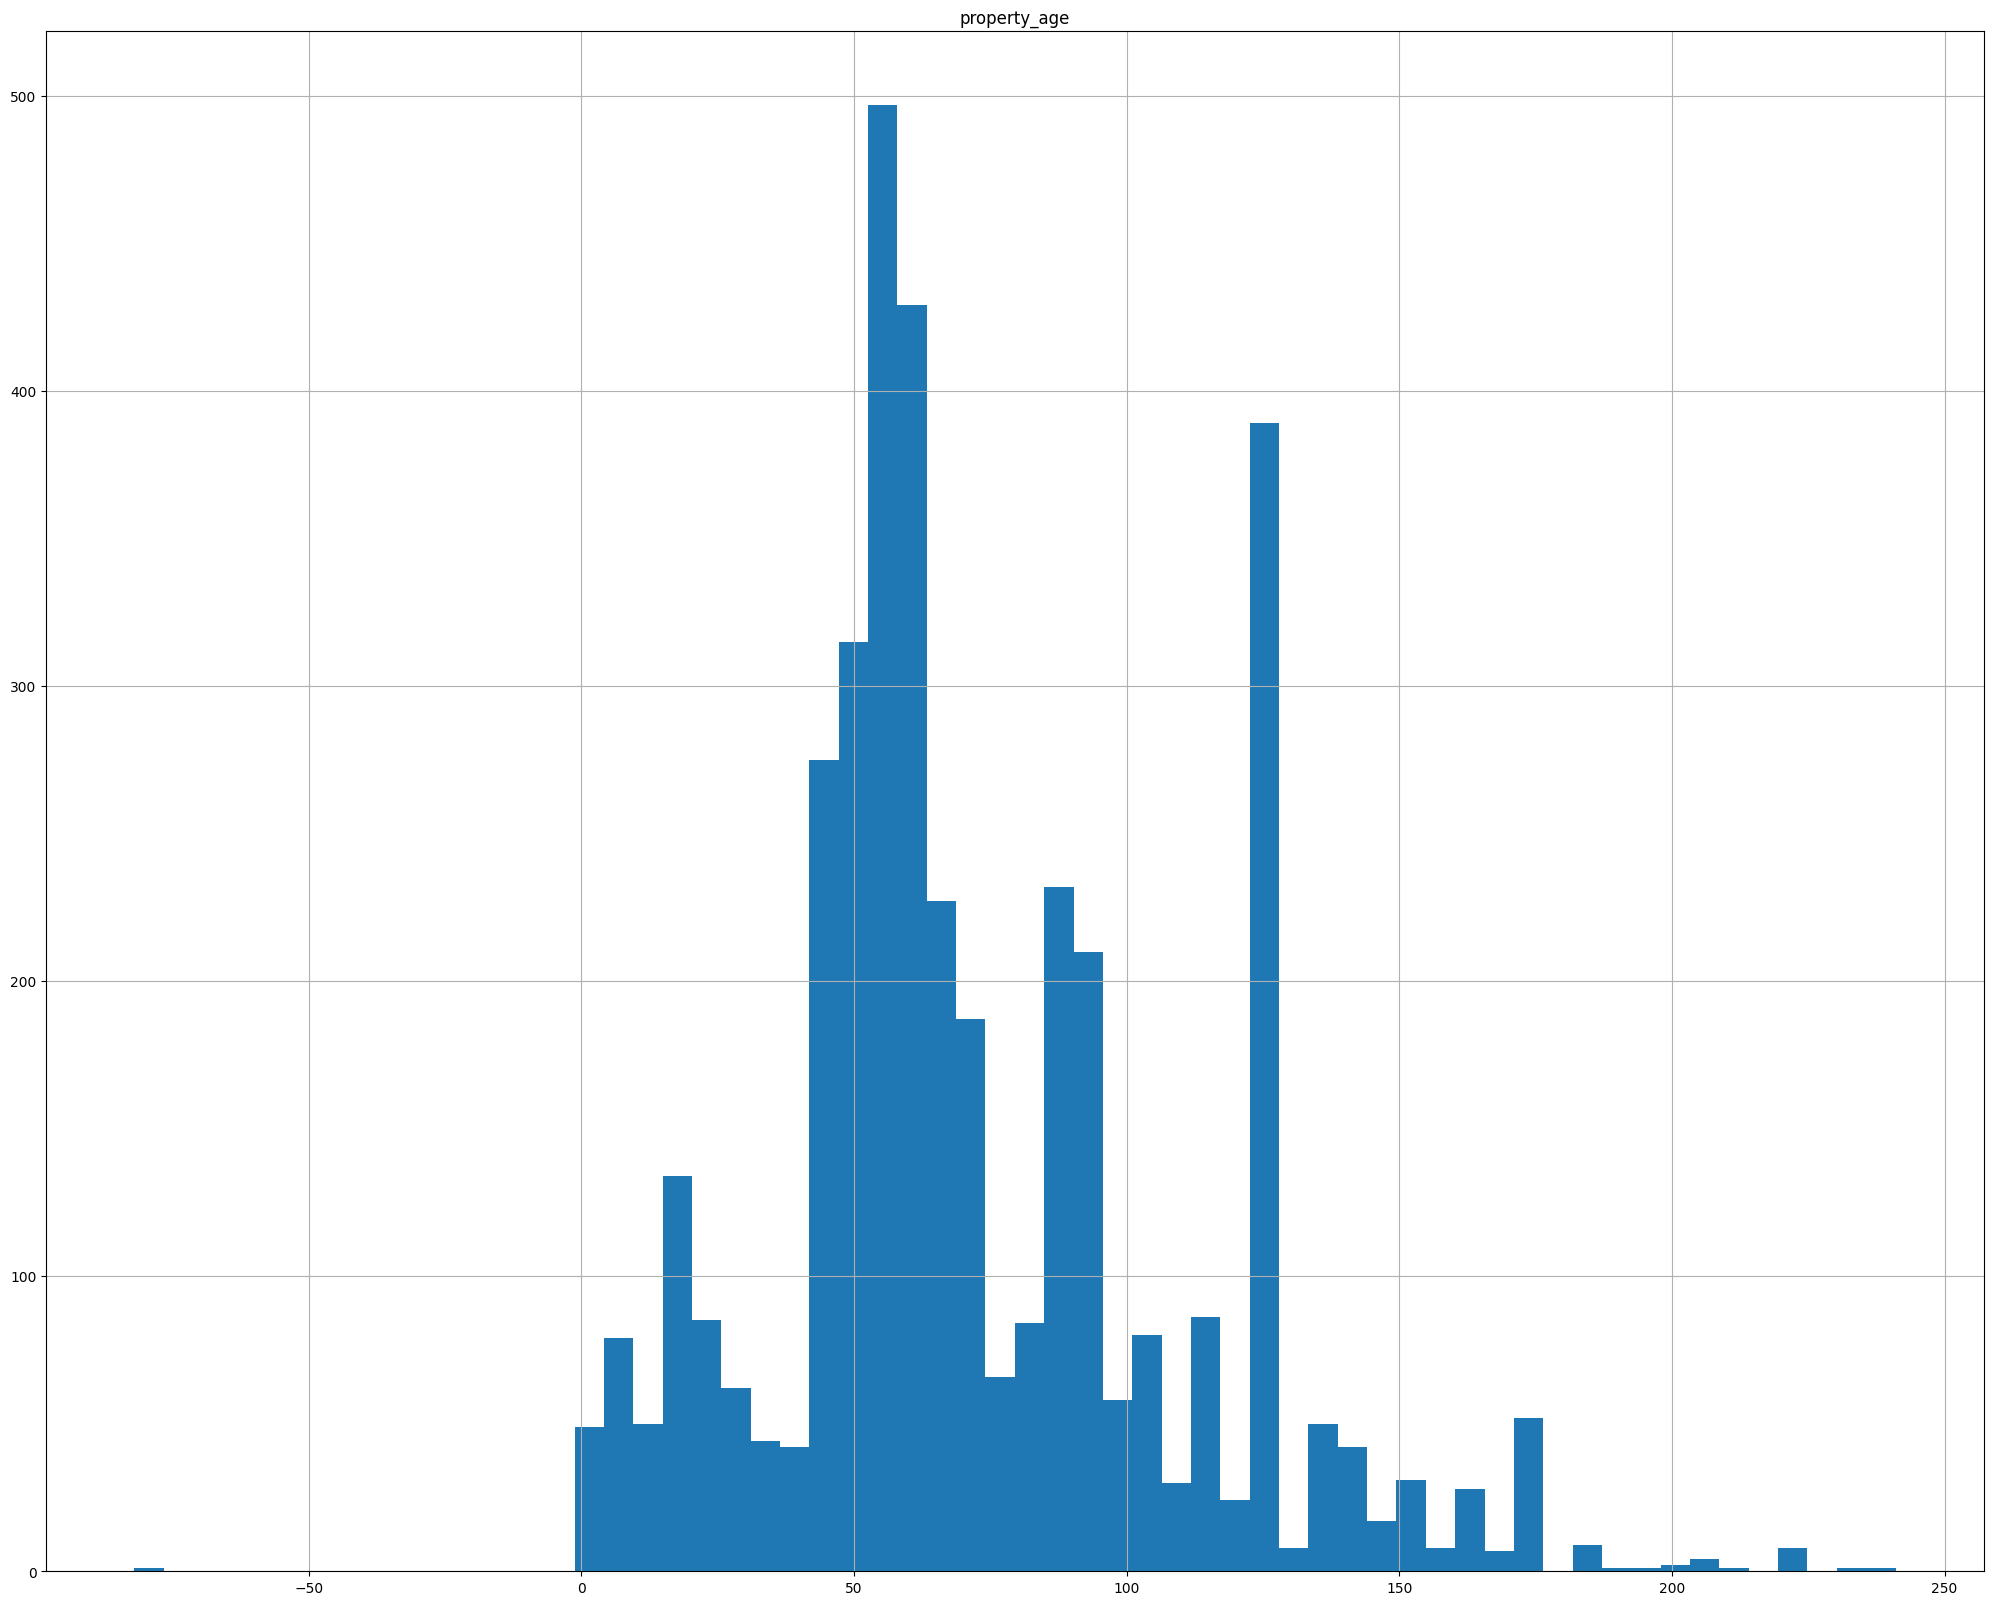

In [20]:
rent_dataset[['property_age']].hist(bins=60, figsize=(25, 20))

Apreciamos pequeños "clusters de viviendas", los cuales podemos agrupar en categorías según la edad de la vivienda:

In [21]:
def conditions(x):
    if x < 0:
        return "Unknown"
    elif ((x >= 0) & (x < 40)):
        return "0 - 40"
    elif ((x >= 40) & (x < 70)):
        return "40 - 70"
    elif ((x >= 70) & (x < 120)):
        return "70 - 120"
    elif ((x >= 120) & (x < 150)):
        return "120 - 150"
    elif ((x >= 150)):
        return "+150"
    else:
        return "Unknown"

func = np.vectorize(conditions)
rent_dataset['property_age_cat'] = func(rent_dataset['property_age'])
rent_dataset.head()

,price,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,...,ac,heating,year_built,neighborhood,dist_city_center,property_type,dist_closest_station,furniture,property_age,property_age_cat
0,850,55,2,1,0.0,0.0,1.0,norte,2.0,0.0,...,1.0,NaN,NaN,Gràcia,2.026455,piso,0.094111,3.0,NaN,Unknown
1,725,37,2,1,1.0,0.0,1.0,sur,3.0,0.0,...,1.0,NaN,1962.0,Sant Gervasi - La Bonanova,3.582409,piso,0.902561,NaN,62.0,40 - 70
2,950,72,3,1,0.0,0.0,1.0,NaN,4.0,0.0,...,1.0,NaN,NaN,El Baix Guinardó,2.663025,piso,0.188177,3.0,NaN,Unknown
3,750,45,1,1,1.0,0.0,1.0,norte,4.0,0.0,...,0.0,NaN,1936.0,Sant Gervasi - La Bonanova,2.910067,piso,0.892917,3.0,88.0,70 - 120
4,990,45,1,1,0.0,0.0,1.0,sur,3.0,0.0,...,0.0,gas,NaN,Sarrià-Sant Gervasi,2.727149,piso,0.293784,3.0,NaN,Unknown


Eliminamos las variables "year_built" y "property_age" que ya no usaremos.

In [22]:
rent_dataset = rent_dataset.drop(['year_built', 'property_age'], axis = 1)

Del dataset que tenemos, generamos un subset con valores numéricos únicamente:

In [23]:
cat_features = ['neighborhood', 'property_type', 'orientation', 'heating', 'property_age_cat','furniture']
rent_dataset_numeric = rent_dataset.drop(cat_features, axis = 1)
rent_dataset_numeric

,price,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,floor,rooftop,elevator,pool,ac,dist_city_center,dist_closest_station
0,850,55,2,1,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2.026455,0.094111
1,725,37,2,1,1.0,0.0,1.0,3.0,0.0,1.0,0.0,1.0,3.582409,0.902561
2,950,72,3,1,0.0,0.0,1.0,4.0,0.0,1.0,0.0,1.0,2.663025,0.188177
3,750,45,1,1,1.0,0.0,1.0,4.0,0.0,1.0,0.0,0.0,2.910067,0.892917
4,990,45,1,1,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,2.727149,0.293784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8497,907,49,0,1,0.0,1.0,1.0,9.0,0.0,1.0,0.0,0.0,1.317748,0.285426
8498,950,125,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.063099,0.534462
8499,950,48,2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.288753,0.261938
8500,926,51,2,1,1.0,0.0,1.0,3.0,0.0,1.0,0.0,1.0,3.909033,0.545561


Comprobamos que no hay nulls:

In [24]:
rent_dataset_numeric.isnull().sum() / len(rent_dataset_numeric)

price                   0.0
sq_meters_built         0.0
rooms                   0.0
bathrooms               0.0
balcony                 0.0
terrace                 0.0
exterior                0.0
floor                   0.0
rooftop                 0.0
elevator                0.0
pool                    0.0
ac                      0.0
dist_city_center        0.0
dist_closest_station    0.0
dtype: float64

---
### Construcción del modelo de Bagging Tree y evaluación de su rendimiento

En éste punto crearemos nuestro primer modelo de bagging. Para ello realizaremos los siguientes puntos:

- Selección de la métrica de optimización: ¿Qué métrica debemos utilizar para optimizar y valorar la calidad de nuestros modelos?
- Split del dataset en training y test: ¿Cómo debemos separar los datos para entrenar y validar nuestro modelo?
- Optimización de hiperparámetros mediante Cross Validation: ¿Qué hiperparámetros deberíamos utilizar para entrenar nuestro modelo?
- Entrenamiento del modelo y análisis de los resultados: ¿Es bueno nuestro modelo?

**Objetivos de éste punto:**

- Definir cómo mediremos los resultados de nuestro modelo
- Generar y entrenar un modelo de datos

---

Primero generamos el split train-test

No estandarizamos los datos ni los escalamos porque nuestros weak-learners son árboles de decisión, los cuales no se basan en la distancia sino en teoría de la información (entropía, gini, ...)

In [25]:
X = rent_dataset_numeric.drop(['price'], axis = 1)
y = rent_dataset_numeric[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Ejemplos de scoring parameter: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

En este caso optamos por un R2.

Hacemos grid search con cross validation para encontrar los parámetros óptimos de nuestro modelo

In [26]:
# we enumerate the values to try
parameters = [{"max_depth":[2,3,4,5,6,7,9], "min_samples_split":[2,5,10]}]

#instantiate the classifier
decision_tree_model = DecisionTreeRegressor()

# Grid search function
grid_tree = GridSearchCV(cv = 10, estimator=decision_tree_model, param_grid=parameters, scoring="r2")
grid_tree.fit(X_train, y_train)
grid_tree.best_params_

{'max_depth': 6, 'min_samples_split': 2}

In [27]:
max_depth = grid_tree.best_params_["max_depth"]
min_samples_split = grid_tree.best_params_["min_samples_split"]

In [28]:
# we enumerate the values to try
parameters = {"n_estimators":[1,5,10,20,50,100,200]}

#instantiate the classifier
decision_tree_model = DecisionTreeRegressor(max_depth = max_depth, min_samples_split = min_samples_split)

#instantiate the classifier
bagging_model = BaggingRegressor(decision_tree_model)

# Grid search function
grid_bag = GridSearchCV(cv = 10, 
                        estimator=bagging_model, 
                        param_grid=parameters, 
                        scoring="r2")
grid_bag.fit(X_train, y_train)
grid_bag.best_params_

{'n_estimators': 50}

In [29]:
n_estimators = grid_bag.best_params_["n_estimators"]

# La función "GridSearchCV" reentrena el modelo utilizando los mejores parámetros 
# encontrados (usando cross-validation) en todo el conjunto de datos de train.
best_bagging_model = grid_bag.best_estimator_

A continuación, con los parámetros óptimos del modelo, procedemos a hacer un xvalidation para entender la performance del modelo:

In [30]:
# Creamos el modelo con los hiperpametros seleccionados en el punto anterior
bag = BaggingRegressor(DecisionTreeRegressor(max_depth = max_depth, min_samples_split = min_samples_split), n_estimators = n_estimators)
# Entrenamos el modelo con el dataset de entrenamiento mediante cross validation
bagging_cv = cross_validate(bag, X_train, y_train, cv = 10, scoring = "r2")

In [31]:
for i, score in enumerate(bagging_cv["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.8195136457902978
Accuracy for the fold no. 1 on the test set: 0.6010934005432722
Accuracy for the fold no. 2 on the test set: 0.5717632655309017
Accuracy for the fold no. 3 on the test set: 0.8037978899546054
Accuracy for the fold no. 4 on the test set: 0.8190162885150307
Accuracy for the fold no. 5 on the test set: 0.8303300372338666
Accuracy for the fold no. 6 on the test set: 0.5910183970287562
Accuracy for the fold no. 7 on the test set: 0.8198542092241208
Accuracy for the fold no. 8 on the test set: 0.7554758239131243
Accuracy for the fold no. 9 on the test set: 0.7384379021204835


Nos encontramos con que hay mucha variación con los datos de entrenamiento (R2 de 0.46 o de 0.82). Ésto nos indica que hay mucha variación en los datos y que probablemente tengamos outlayers o grupos de instancias que no estamos prediciendo correctamente

{'whiskers': [<matplotlib.lines.Line2D at 0x1e9ac32e630>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9acd64ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9ac34b2f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e9acd64e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9acd64860>],
 'means': []}

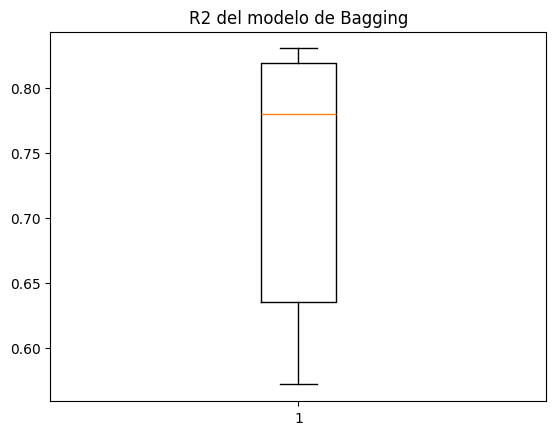

In [32]:
fig1, ax1 = plt.subplots()
ax1.set_title('R2 del modelo de Bagging')
ax1.boxplot(bagging_cv["test_score"])

Generamos las predicciones y calculamos el resultado de validación:

In [33]:
y_pred_train = best_bagging_model.predict(X_train)
y_pred_test = best_bagging_model.predict(X_test)

R2 del modelo en entrenamiento:

In [34]:
r2_train_bagging = metrics.r2_score(y_train, y_pred_train)
r2_train_bagging

0.8816762389238877

R2 en validación

In [35]:
r2_validation_bagging = metrics.r2_score(y_test, y_pred_test)
r2_validation_bagging

0.8614762789544447

Para realizar una futura comparación entre los modelos construidos, nos guardamos los resultados de las iteraciones de cross-validation en un diccionario y los resultados de validación y entrenamiento en un dataframe: 

In [36]:
# Creamos el diccionario y el DataFrame vacío
cv = {}
results = pd.DataFrame(columns=['model','mean_r2_cv_test','r2_train','r2_validation'])

# Guardamos los resultados de Bagging entrenado con el dataset reducido
cv['decision_tree_bagging_reduced'] = bagging_cv["test_score"]
model_bagging_results = ['decision_tree_bagging_reduced', np.mean(bagging_cv["test_score"]), r2_train_bagging, r2_validation_bagging]
results = pd.concat([results,pd.DataFrame([model_bagging_results], columns=results.columns)], ignore_index=True)

results

,model,mean_r2_cv_test,r2_train,r2_validation
0,decision_tree_bagging_reduced,0.73503,0.881676,0.861476


#### Análisis de los weak learners de Bagging Tree

In [37]:
# Asi vemos que variables se han usado para entrenar cada weak learner, 
# Como es un modelo de Bagging, todas las variables para todos los entrenamientos

best_bagging_model.estimators_features_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([

In [38]:
print(f"Cada muestra bootstrap está compuesta de {len(best_bagging_model.estimators_samples_[0])} instancias")

# Así podemos ver las muestras bootstrap usadas para entrenar cada weak learner
best_bagging_model.estimators_samples_

Cada muestra bootstrap está compuesta de 6801 instancias


[array([6384, 3856, 4908, ..., 1087, 3095,  703]),
 array([5828, 2118, 1929, ..., 3679, 1130, 6511]),
 array([5155, 1617, 5472, ..., 4190, 2241, 3454]),
 array([6004, 4291, 3841, ..., 3927, 1568, 1395]),
 array([ 808, 4328, 4811, ..., 2393, 2274, 2631]),
 array([1730, 3730, 6544, ...,  126, 4955, 3430]),
 array([2247, 1350, 4706, ..., 5434, 5475, 4009]),
 array([ 785, 2205, 1883, ...,  249, 5549,  999]),
 array([3955, 2680, 2547, ..., 1596, 1095, 2382]),
 array([4137, 2968, 3707, ..., 2553, 2306, 4779]),
 array([6694, 4326, 2191, ..., 4767, 1749, 6414]),
 array([5549, 3567, 3647, ..., 3996, 1797, 2786]),
 array([1279, 3986, 6257, ...,  389, 6519, 4644]),
 array([2764, 6099, 6304, ..., 6570, 5594, 6712]),
 array([2222, 2173,  389, ..., 3832, 3533, 2082]),
 array([5089, 2318, 2901, ..., 1286, 4932, 1641]),
 array([5714, 5583, 6224, ..., 2272, 2384, 3199]),
 array([2305, 4111, 6581, ..., 5521, 4527, 4215]),
 array([6111, 1537,  135, ..., 4887, 3128, 5790]),
 array([5296, 1286,  637, ..., 

In [39]:
# Obtenemos la métrica r2_validation (sacada a partir de los datos test) para cada weak learner 

r2_wl_list = []

for weak_learner in best_bagging_model.estimators_:
    y_pred_test = weak_learner.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    r2_wl_list.append(r2_test)
    
print("r2_validation media de los weak learners "+str(np.mean(r2_wl_list)))
print("r2_validation del strong learner "+str(results["r2_validation"][0]))

r2_validation media de los weak learners 0.6449808512418868
r2_validation del strong learner 0.8614762789544447


Observamos una mejora de casi el 0,2 en $R^2$ al agregar todos los modelos a través de la técnica Bagging.

# Modelo de Random Forest, tratamiento de las variables categóricas y comparación de modelos

El objetivo de ésta sesión será familiarizarnos con el concepto de One-hot encoding y sobre el modelo de Random Forest.

---
### Tratamiento de variables categóricas: One-hot encoding

En este punto buscamos manipular las variables categóricos texto en factores binarios.

- Generación de un nuevo dataset de training y validación (Con y sin one-hot encoding): ¿Cómo podemos preparar el código para generar modelos distintos?


**Objetivos de éste punto:**

- Transformar las variables categóricas en factores binarios 
- Aplicar los valores obenidos en el modelo de bagging del punto anterior
---

In [40]:
# Test ANOVA
#for cat_feature in cat_features:
 #   model_def = 'price ~ ' + cat_feature
  #  anova_model = ols(model_def, data=rent_dataset).fit()
   # aov_table = sm.stats.anova_lm(anova_model, typ=2)
   # print(aov_table)

En éste caso vemos como las 4 categorías más importantes según los resultados del test ANOVA medidos mediante la F y el p value son:

- property_type
- heating
- furniture
- neighborhood

Atendiendo al property type, vamos a sacar la mediana del precio de la vivienda en donde vemos una clara proporción entre barrios de precio alto, medio y bajo:

In [41]:
neighborhood = rent_dataset[['neighborhood', 'price']].groupby('neighborhood', as_index=False).agg(
    # Number of instances per category
    category_count=('price', "count"),
    # Mean price
    mean_price=('price', "mean"),
    # Median price
    median_price=('price', "median"),
    # Min price
    min_price=('price', min),
    # Max price
    max_price=('price', max),
    # Standard deviation
    stantard_deviation=('price', "std")).sort_values('median_price', ascending = False).reset_index()

neighborhood.head(60)

,index,neighborhood,category_count,mean_price,median_price,min_price,max_price,stantard_deviation
0,55,Pedralbes,49,3114.122449,2300.0,550,14000,2622.439423
1,6,Diagonal Mar i el Front Marítim del Poblenou,50,2716.300000,2150.0,890,10000,2151.594276
2,49,La Vila Olímpica del Poblenou,20,1546.950000,1722.5,750,2600,508.797289
3,52,Les Tres Torres,59,1672.288136,1500.0,460,5500,1119.686425
4,32,La Dreta de l'Eixample,309,1902.275081,1450.0,450,16800,1828.864233
5,61,Sant Gervasi - Galvany,358,1898.871508,1400.0,600,15000,1671.755972
6,70,Sarrià-Sant Gervasi,124,2425.862903,1300.0,550,20000,2862.691784
7,72,Vallvidrera - El Tibidabo i les Planes,5,4838.000000,1200.0,790,20000,8479.529468
8,69,Sarrià,146,1992.369863,1200.0,515,7700,1653.428559
9,20,El Parc i la Llacuna del Poblenou,51,1204.176471,1150.0,765,2750,390.296846


Text(0, 0.5, 'median_price_m2')

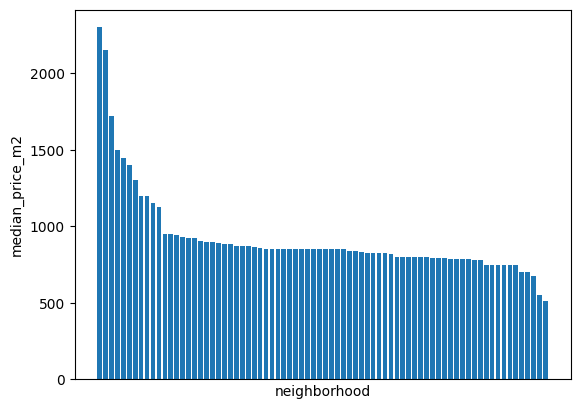

In [42]:
plt.bar(x = 'neighborhood', height = 'median_price', data = neighborhood)
plt.xticks([])
plt.xlabel('neighborhood')
plt.ylabel('median_price_m2')

En este caso, podemos definir 3 tiers de precios según la zona dado que nos encontraremos con viviendas con pocas instancias

In [43]:
def conditions(x):
    if x < 0:
        return "Unknown"
    elif ((x >= 0) & (x < 800)):
        return "0 - 800"
    elif ((x >= 800) & (x < 1000)):
        return "800 - 1000"
    elif ((x >= 1000)):
        return "+1000"
    else:
        return "Unknown"

func = np.vectorize(conditions)
neighborhood['neighborhood_rent_index'] = func(neighborhood['median_price'])
neighborhood.head()

,index,neighborhood,category_count,mean_price,median_price,min_price,max_price,stantard_deviation,neighborhood_rent_index
0,55,Pedralbes,49,3114.122449,2300.0,550,14000,2622.439423,+1000
1,6,Diagonal Mar i el Front Marítim del Poblenou,50,2716.300000,2150.0,890,10000,2151.594276,+1000
2,49,La Vila Olímpica del Poblenou,20,1546.950000,1722.5,750,2600,508.797289,+1000
3,52,Les Tres Torres,59,1672.288136,1500.0,460,5500,1119.686425,+1000
4,32,La Dreta de l'Eixample,309,1902.275081,1450.0,450,16800,1828.864233,+1000


Finalmente agregamos ésta información el modelo de datos

In [44]:
neighborhood_mapping = neighborhood[['neighborhood', 'neighborhood_rent_index']]

rent_dataset = pd.merge(rent_dataset, neighborhood_mapping, on='neighborhood', how='left')

rent_dataset.head()

,price,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,...,pool,ac,heating,neighborhood,dist_city_center,property_type,dist_closest_station,furniture,property_age_cat,neighborhood_rent_index
0,850,55,2,1,0.0,0.0,1.0,norte,2.0,0.0,...,0.0,1.0,NaN,Gràcia,2.026455,piso,0.094111,3.0,Unknown,800 - 1000
1,725,37,2,1,1.0,0.0,1.0,sur,3.0,0.0,...,0.0,1.0,NaN,Sant Gervasi - La Bonanova,3.582409,piso,0.902561,NaN,40 - 70,800 - 1000
2,950,72,3,1,0.0,0.0,1.0,NaN,4.0,0.0,...,0.0,1.0,NaN,El Baix Guinardó,2.663025,piso,0.188177,3.0,Unknown,800 - 1000
3,750,45,1,1,1.0,0.0,1.0,norte,4.0,0.0,...,0.0,0.0,NaN,Sant Gervasi - La Bonanova,2.910067,piso,0.892917,3.0,70 - 120,800 - 1000
4,990,45,1,1,0.0,0.0,1.0,sur,3.0,0.0,...,0.0,0.0,gas,Sarrià-Sant Gervasi,2.727149,piso,0.293784,3.0,Unknown,+1000


In [45]:
cat_features.remove("neighborhood")
cat_features.append('neighborhood_rent_index')
rent_dataset = rent_dataset.drop(['neighborhood'], axis = 1)

In [46]:
cat_features

['property_type',
 'orientation',
 'heating',
 'property_age_cat',
 'furniture',
 'neighborhood_rent_index']

In [47]:
mapeo_categorias = {1: "Sin Equipar", 2: "Cocina Equipada", 3: "Amueblado"}
rent_dataset['furniture'] = rent_dataset['furniture'].replace(mapeo_categorias)

rent_dataset.head()

,price,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,pool,ac,heating,dist_city_center,property_type,dist_closest_station,furniture,property_age_cat,neighborhood_rent_index
0,850,55,2,1,0.0,0.0,1.0,norte,2.0,0.0,0.0,0.0,1.0,NaN,2.026455,piso,0.094111,Amueblado,Unknown,800 - 1000
1,725,37,2,1,1.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,1.0,NaN,3.582409,piso,0.902561,NaN,40 - 70,800 - 1000
2,950,72,3,1,0.0,0.0,1.0,NaN,4.0,0.0,1.0,0.0,1.0,NaN,2.663025,piso,0.188177,Amueblado,Unknown,800 - 1000
3,750,45,1,1,1.0,0.0,1.0,norte,4.0,0.0,1.0,0.0,0.0,NaN,2.910067,piso,0.892917,Amueblado,70 - 120,800 - 1000
4,990,45,1,1,0.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,0.0,gas,2.727149,piso,0.293784,Amueblado,Unknown,+1000


Veamos qué variables nos quedan aun con valores nulls: 

In [48]:
rent_dataset.isnull().sum() / len(rent_dataset)

price                      0.000000
sq_meters_built            0.000000
rooms                      0.000000
bathrooms                  0.000000
balcony                    0.000000
terrace                    0.000000
exterior                   0.000000
orientation                0.566455
floor                      0.000000
rooftop                    0.000000
elevator                   0.000000
pool                       0.000000
ac                         0.000000
heating                    0.356387
dist_city_center           0.000000
property_type              0.000235
dist_closest_station       0.000000
furniture                  0.147259
property_age_cat           0.000000
neighborhood_rent_index    0.000000
dtype: float64

Observamos que todas son categóricas, pues sustituimos los valores NaN de las variables categóricas restantes por una categoría 'Unknown'. 

In [49]:
for cat_feature in cat_features:
    rent_dataset[cat_feature].fillna("Unknown", inplace = True) 
    
rent_dataset.head()

,price,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,pool,ac,heating,dist_city_center,property_type,dist_closest_station,furniture,property_age_cat,neighborhood_rent_index
0,850,55,2,1,0.0,0.0,1.0,norte,2.0,0.0,0.0,0.0,1.0,Unknown,2.026455,piso,0.094111,Amueblado,Unknown,800 - 1000
1,725,37,2,1,1.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,1.0,Unknown,3.582409,piso,0.902561,Unknown,40 - 70,800 - 1000
2,950,72,3,1,0.0,0.0,1.0,Unknown,4.0,0.0,1.0,0.0,1.0,Unknown,2.663025,piso,0.188177,Amueblado,Unknown,800 - 1000
3,750,45,1,1,1.0,0.0,1.0,norte,4.0,0.0,1.0,0.0,0.0,Unknown,2.910067,piso,0.892917,Amueblado,70 - 120,800 - 1000
4,990,45,1,1,0.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,0.0,gas,2.727149,piso,0.293784,Amueblado,Unknown,+1000


Comprobamos que no haya valores nulls:

In [50]:
rent_dataset.isnull().sum() / len(rent_dataset)

price                      0.0
sq_meters_built            0.0
rooms                      0.0
bathrooms                  0.0
balcony                    0.0
terrace                    0.0
exterior                   0.0
orientation                0.0
floor                      0.0
rooftop                    0.0
elevator                   0.0
pool                       0.0
ac                         0.0
heating                    0.0
dist_city_center           0.0
property_type              0.0
dist_closest_station       0.0
furniture                  0.0
property_age_cat           0.0
neighborhood_rent_index    0.0
dtype: float64

Aplicamos one-hot encoding para las variables categóricas (recomiendo no usar "pd.get_dummies"): 

In [51]:
# Crear el objeto OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

#fit
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(rent_dataset[cat_features])

#transform
df_encoded_onehot = pd.DataFrame(ohe.transform(rent_dataset[cat_features]).toarray(), columns=ohe.get_feature_names_out(cat_features))

# Eliminar las columnas categóricas del DataFrame original
rent_dataset_numeric = rent_dataset.drop(columns=cat_features, axis=1)

# Concatenar los DataFrames codificados one-hot y el original sin las columnas categóricas
rent_dataset_numeric = pd.concat([rent_dataset_numeric, df_encoded_onehot], axis=1)

rent_dataset_numeric.head()

,price,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,floor,rooftop,elevator,...,property_age_cat_0 - 40,property_age_cat_120 - 150,property_age_cat_40 - 70,property_age_cat_70 - 120,property_age_cat_Unknown,furniture_Amueblado,furniture_Unknown,neighborhood_rent_index_+1000,neighborhood_rent_index_0 - 800,neighborhood_rent_index_800 - 1000
0,850,55,2,1,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,725,37,2,1,1.0,0.0,1.0,3.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,950,72,3,1,0.0,0.0,1.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,750,45,1,1,1.0,0.0,1.0,4.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,990,45,1,1,0.0,0.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [52]:
# Repasamos las columnas creadas
list(rent_dataset_numeric.columns)

['price',
 'sq_meters_built',
 'rooms',
 'bathrooms',
 'balcony',
 'terrace',
 'exterior',
 'floor',
 'rooftop',
 'elevator',
 'pool',
 'ac',
 'dist_city_center',
 'dist_closest_station',
 'property_type_Unknown',
 'property_type_atico',
 'property_type_chalet',
 'property_type_chalet_adosado',
 'property_type_chalet_independiente',
 'property_type_chalet_pareado',
 'property_type_duplex',
 'property_type_estudio',
 'property_type_piso',
 'orientation_ este',
 'orientation_ norte',
 'orientation_ oeste',
 'orientation_ sur',
 'orientation_Unknown',
 'heating_Unknown',
 'heating_bomba',
 'heating_electric',
 'heating_gas',
 'heating_individual',
 'heating_na',
 'property_age_cat_+150',
 'property_age_cat_0 - 40',
 'property_age_cat_120 - 150',
 'property_age_cat_40 - 70',
 'property_age_cat_70 - 120',
 'property_age_cat_Unknown',
 'furniture_Amueblado',
 'furniture_Unknown',
 'neighborhood_rent_index_+1000',
 'neighborhood_rent_index_0 - 800',
 'neighborhood_rent_index_800 - 1000']

Llegados a este punto tenemos dos datasets:
- rent_dataset: donde tenemos las variables categóricas y numéricas en su estado puro
- rent_dataset_numeric: es el mismo dataset que rent_dataset pero con la aplicación de OneHot encoding. 

---
### Modelo de Random Forest

En éste punto crearemos nuestro primer modelo de Random Forest. Para ello realizaremos los siguientes puntos:

- Optimización de hiperparámetros mediante Cross Validation: ¿Qué hiperparámetros deberíamos utilizar para entrenar nuestro modelo?
- Entrenamiento del modelo y análisis de los resultados: ¿Es bueno nuestro modelo?,  ¿Cómo se comparan todos los modelos obtenidos? (Bagging, Random Forest, Con y sin one-hot encoding) 

**Objetivos de éste punto:**

- Generar y entrenar múltiples modelos de datos y comparar los resultados obtenidos
---

Ahora que tenemos el dataset totalmente procesado y a punto para aplicarlo a los modelos de ML (contemplando tanto variables categóricas como numéricas), lo aplicaremos para Random Forest y volveremos a aplicarlo para Bagging. Así podremos compararlos de una forma mas justa, ya que en la sesión 1 del working lab Bagging solo había sido entrenado con variables numéricas. 

Hacemos split train-test de para este nuevo dataset: 


In [53]:
X = rent_dataset_numeric.drop(['price'], axis = 1)
y = rent_dataset_numeric[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [54]:
rent_dataset_numeric.head()

,price,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,floor,rooftop,elevator,...,property_age_cat_0 - 40,property_age_cat_120 - 150,property_age_cat_40 - 70,property_age_cat_70 - 120,property_age_cat_Unknown,furniture_Amueblado,furniture_Unknown,neighborhood_rent_index_+1000,neighborhood_rent_index_0 - 800,neighborhood_rent_index_800 - 1000
0,850,55,2,1,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,725,37,2,1,1.0,0.0,1.0,3.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,950,72,3,1,0.0,0.0,1.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,750,45,1,1,1.0,0.0,1.0,4.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,990,45,1,1,0.0,0.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


#### Bagging Tree

Volvemos a entrenar el modelo de Bagging con el dataset numérico extendido (gracias a One-Hot Encoding).

In [55]:
# we enumerate the values to try
parameters = [{"max_depth":[2,3,4,5,6,7,9], "min_samples_split":[2,5,10]}]

#instantiate the classifier
decision_tree_model = DecisionTreeRegressor()

# Grid search function
grid_tree = GridSearchCV(cv = 10, estimator=decision_tree_model, param_grid=parameters, scoring="r2")
grid_tree.fit(X_train, y_train)
grid_tree.best_params_

{'max_depth': 6, 'min_samples_split': 2}

In [56]:
max_depth = grid_tree.best_params_["max_depth"]
min_samples_split = grid_tree.best_params_["min_samples_split"]

In [57]:
# we enumerate the values to try
parameters = {"n_estimators":[1,5,10,20,50,100,200]}

#instantiate the classifier
decision_tree_model = DecisionTreeRegressor(max_depth = max_depth, min_samples_split = min_samples_split)

#instantiate the classifier
bagging_model = BaggingRegressor(decision_tree_model)

# Grid search function
grid_bag = GridSearchCV(cv = 10, 
                        estimator=bagging_model, 
                        param_grid=parameters, 
                        scoring="r2")
grid_bag.fit(X_train, y_train)
grid_bag.best_params_

{'n_estimators': 200}

In [58]:
n_estimators = grid_bag.best_params_["n_estimators"]

# La función "GridSearchCV" reentrena el modelo utilizando los mejores parámetros 
# encontrados (usando cross-validation) en todo el conjunto de datos de train.
best_bagging_model = grid_bag.best_estimator_

A continuación, con los parámetros óptimos del modelo, procedemos a hacer un xvalidation para entender la performance del modelo:

In [59]:
# Creamos el modelo con los hiperpametros seleccionados en el punto anterior
bag = BaggingRegressor(DecisionTreeRegressor(max_depth = max_depth, min_samples_split = min_samples_split), n_estimators = n_estimators)
# Entrenamos el modelo con el dataset de entrenamiento mediante cross validation
bagging_cv = cross_validate(bag, X_train, y_train, cv = 10, scoring = "r2")

In [60]:
for i, score in enumerate(bagging_cv["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.8204114449872912
Accuracy for the fold no. 1 on the test set: 0.6331441778400415
Accuracy for the fold no. 2 on the test set: 0.5265255765125703
Accuracy for the fold no. 3 on the test set: 0.8112215323427538
Accuracy for the fold no. 4 on the test set: 0.8105339170640083
Accuracy for the fold no. 5 on the test set: 0.8527905784459207
Accuracy for the fold no. 6 on the test set: 0.6844610997374683
Accuracy for the fold no. 7 on the test set: 0.8137184738695397
Accuracy for the fold no. 8 on the test set: 0.7687419596163652
Accuracy for the fold no. 9 on the test set: 0.7430538232796434


{'whiskers': [<matplotlib.lines.Line2D at 0x1e9adbb8e00>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9adbba090>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9adbba4b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e9adbb8410>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9adbb8b00>],
 'means': []}

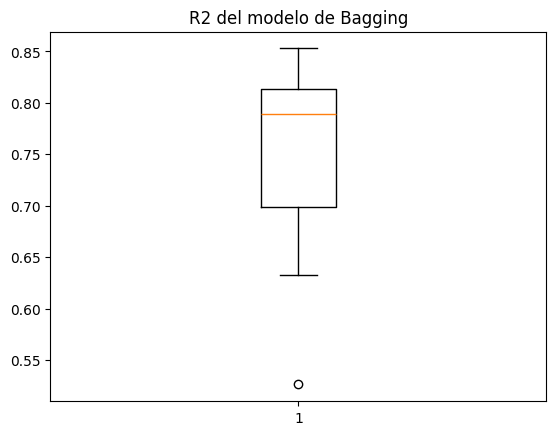

In [61]:
fig1, ax1 = plt.subplots()
ax1.set_title('R2 del modelo de Bagging')
ax1.boxplot(bagging_cv["test_score"])

Generamos las predicciones y calculamos el resultado de validación:

In [62]:
y_pred_train = best_bagging_model.predict(X_train)
y_pred_test = best_bagging_model.predict(X_test)

R2 del modelo en entrenamiento:

In [63]:
r2_train_bagging = metrics.r2_score(y_train, y_pred_train)
r2_train_bagging

0.8860454203088454

R2 en validación

In [64]:
r2_validation_bagging = metrics.r2_score(y_test, y_pred_test)
r2_validation_bagging

0.8454464570846479

Para realizar una futura comparación entre los modelos construidos, nos guardamos los resultados de las iteraciones de cross-validation en un diccionario y los resultados de validación y entrenamiento en un dataframe: 

In [65]:
# Guardamos los resultados de Bagging entrenado con el dataset reducido
cv['decision_tree_bagging'] = bagging_cv["test_score"]
model_bagging_results = ['decision_tree_bagging', np.mean(bagging_cv["test_score"]), r2_train_bagging, r2_validation_bagging]
results = pd.concat([results,pd.DataFrame([model_bagging_results], columns=results.columns)], ignore_index=True)

results

,model,mean_r2_cv_test,r2_train,r2_validation
0,decision_tree_bagging_reduced,0.73503,0.881676,0.861476
1,decision_tree_bagging,0.74646,0.886045,0.845446



#### Random Forest

In [ ]:
# we enumerate the values to try
parameters = {"n_estimators":[100,150,200], "max_depth": [5,10,15]}

#instantiate the classifier
rf = RandomForestRegressor()

# Grid search function
grid_rf = GridSearchCV(cv = 10, estimator=rf, param_grid=parameters, scoring="r2")
grid_rf.fit(X_train, y_train)
grid_rf.best_params_

In [ ]:
n_estimators = grid_rf.best_params_["n_estimators"]
max_depth = grid_rf.best_params_["max_depth"]

# La función "GridSearchCV" reentrena el modelo utilizando los mejores parámetros 
# encontrados (usando cross-validation) en todo el conjunto de datos de train.
best_rf_model = grid_rf.best_estimator_

A continuación, con los parámetros óptimos del modelo, procedemos a hacer un xvalidation para entender la performance del modelo:

In [ ]:
# Creamos el modelo con los hiperpametros seleccionados en el punto anterior
rf = RandomForestRegressor(max_depth = max_depth, n_estimators = n_estimators)
# Entrenamos el modelo con el dataset de entrenamiento mediante cross validation
rf_cv = cross_validate(rf, X_train, y_train, cv = 10, scoring = "r2")

In [ ]:
for i, score in enumerate(rf_cv["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.8295001793696916
Accuracy for the fold no. 1 on the test set: 0.6584004708080906
Accuracy for the fold no. 2 on the test set: 0.5285648936857031
Accuracy for the fold no. 3 on the test set: 0.8028850534409124
Accuracy for the fold no. 4 on the test set: 0.8518122837098946
Accuracy for the fold no. 5 on the test set: 0.8642703918216179
Accuracy for the fold no. 6 on the test set: 0.6849515919234969
Accuracy for the fold no. 7 on the test set: 0.8425787815859598
Accuracy for the fold no. 8 on the test set: 0.7830756762504345
Accuracy for the fold no. 9 on the test set: 0.7701132309685046


Nos encontramos con que hay mucha variación con los datos de entrenamiento (R2 de 0.43 o de 0.85). Ésto nos indica que hay mucha variación en los datos y que probablemente tengamos outlayers o grupos de instancias que no estamos prediciendo correctamente

{'whiskers': [<matplotlib.lines.Line2D at 0x142647150>,
 'caps': [<matplotlib.lines.Line2D at 0x142654610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1425ef710>],
 'medians': [<matplotlib.lines.Line2D at 0x142655490>],
 'fliers': [<matplotlib.lines.Line2D at 0x142655cd0>],
 'means': []}

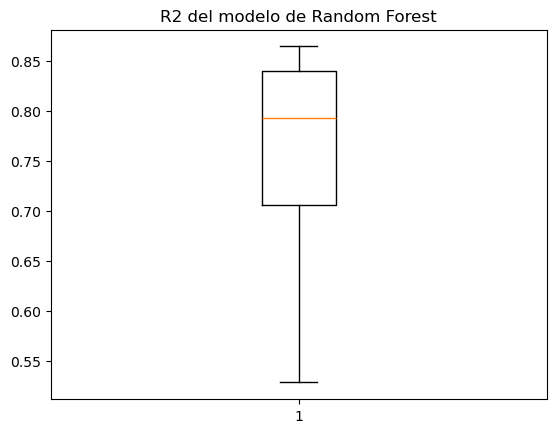

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('R2 del modelo de Random Forest')
ax1.boxplot(rf_cv["test_score"])

Generamos las predicciones y calculamos el resultado de validación:

In [ ]:
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

R2 del modelo en entrenamiento:

In [ ]:
r2_train_rf = metrics.r2_score(y_train, y_pred_train)
r2_train_rf

0.9620431877922797

R2 en validación

In [ ]:
r2_validation_rf = metrics.r2_score(y_test, y_pred_test)
r2_validation_rf

0.8838513983103371

Observamos que el modelo está sobreentrenado. Para evitarlo deberíamos de añadir más parámetros de control del modelo y/o rebajar la profundidad máxima de los árboles que se usan como weak learners. 

Para realizar una futura comparación entre los modelos construidos, nos guardamos los resultados de las iteraciones de cross-validation en un diccionario y los resultados de validación y entrenamiento en un dataframe: 

In [ ]:
# Guardamos los resultados de RF
cv['rf'] = rf_cv["test_score"]
model_rf_results = ['rf', np.mean(rf_cv["test_score"]), r2_train_rf, r2_validation_rf]
results = pd.concat([results,pd.DataFrame([model_rf_results], columns=results.columns)], ignore_index=True)

results

,model,mean_r2_cv_test,r2_train,r2_validation
0,decision_tree_bagging_reduced,0.717794,0.854118,0.852521
1,decision_tree_bagging,0.706590,0.814975,0.828094
2,rf,0.761615,0.962043,0.883851


#### Comparación de modelos

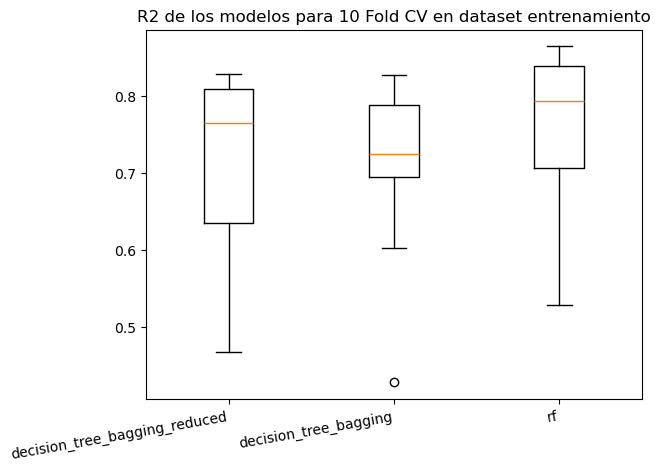

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('R2 de los modelos para 10 Fold CV en dataset entrenamiento')
ax1.boxplot(pd.DataFrame(cv))
ax1.set_xticklabels(cv.keys(), rotation=10, ha="right")

plt.show()

Observamos que el modelo de Random Forest, aunque es el que mejores resultados da en el dataset de test, es el que más variabilidad (junto con "decision_tree_bagging_reduced") presenta en la cross-fold validation. Esto es debido al sobreentrenamiento que presenta. En conclusión, el modelo de Bagging aunque tenga menor performance en el dataset test, parece ser un modelo más robusto, y por tanto, mejor para poder hacer predicciones de las nuevas observaciones.  

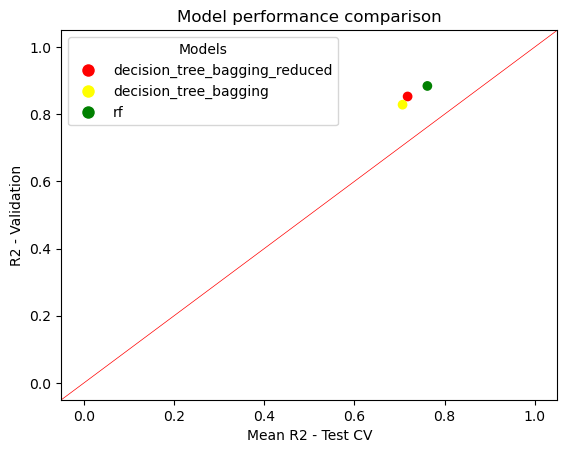

In [ ]:
colors = {'decision_tree_bagging_reduced':'red', 'decision_tree_bagging':'yellow', 'rf':'green'}
fig, ax = plt.subplots()

ax.scatter(x='mean_r2_cv_test', y = 'r2_validation', data=results, c=results['model'].map(colors))
ax.axline((0, 0), (1, 1), linewidth=0.5, color='r')
plt.title("Model performance comparison")
plt.xlabel("Mean R2 - Test CV")
plt.ylabel("R2 - Validation")

legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=model, markerfacecolor=color, markersize=10) for model, color in colors.items()]
ax.legend(handles=legend_labels, title='Models', loc='upper left')
    
plt.show()

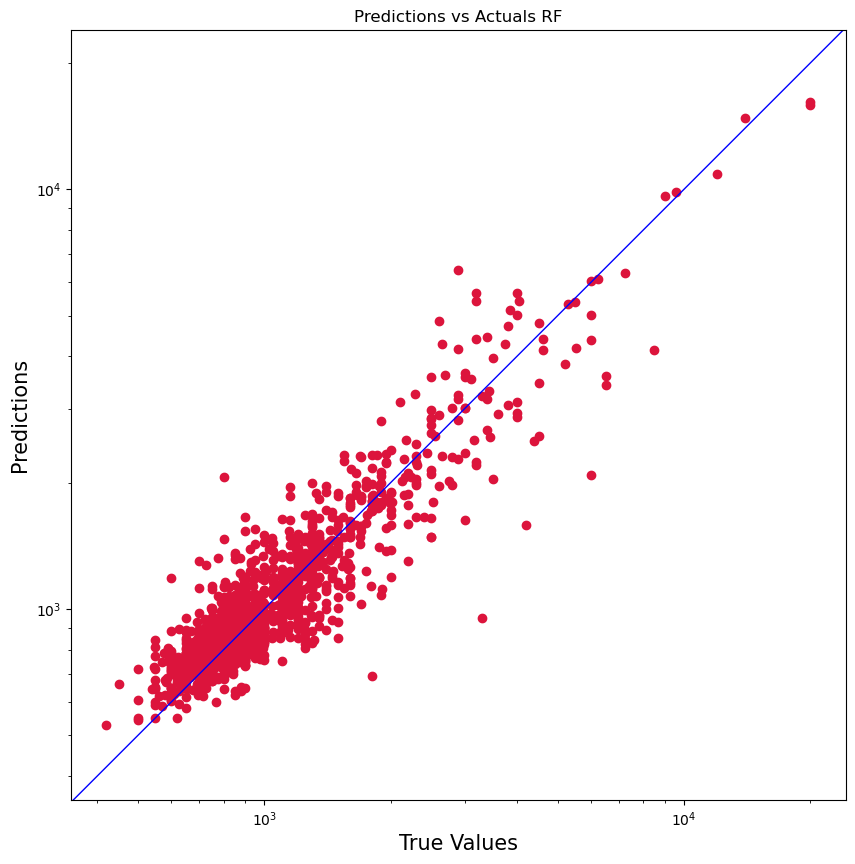

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_pred_test), np.max(y_test.values))
p2 = min(min(y_pred_test), np.min(y_test.values))
plt.axline((p2,p2), (p1,p1), linewidth=1, color='b')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Predictions vs Actuals RF')
plt.axis('equal')
plt.show()

Vemos que que cuanto mayor es el precio de predecir, peor es la predicción de nuestros modelos. Eso se explica porqué la gran densidad de datos (donde nuestros modelos prestan más atención) se encuentran a los alrededores de los 1000€ de precio de alquiler. 

In [ ]:
# create a train/test split with catboost
d_train_cat = cat.Pool(X_train, y_train)
d_test_cat = cat.Pool(X_test, y_test)

In [ ]:
model = cat.CatBoostRegressor()

grid = {'learning_rate': [0.015, 0.01],
        'depth': [8, 10, 12]}

grid_search_result = model.grid_search(grid, 
                                       X_train, 
                                       y_train, 
                                       plot=True)

In [ ]:
# Model cross validation
params = {"iterations": [2,3,4,5,10,100]
          , "depth": [2,5,10]
          , "loss_function": "RMSE"
          , "learning_rate": [0.05, 0.025, 0.015, 0.01]
          , "verbose": False}

scores = cat.cv(d_train_cat
            , params
            , fold_count = 10
            , plot = "True")

In [ ]:
model_cat = cat.CatBoostRegressor(iterations = n
                                   , learning_rate = n
                                   , loss_function = "RMSE"
                                   , random_seed = 2
                                   , depth = n)

model_cat.fit(d_train_cat
                , eval_set = d_test_cat
                , verbose_eval=150
                , early_stopping_rounds=50
                , plot = True)

In [ ]:
# Predicción con los datos train
y_pred_train = model_cat.predict(X_train)
r2_train_cat = metrics.r2_score(y_train, y_pred_train)

# Predicción con los datos train
y_pred_test = model_cat.predict(X_test)
r2_test_cat = metrics.r2_score(y_test, y_pred_test)

print('R2 para la predicción con los datos train: ', r2_train_cat)
print('R2 para la predicción con los datos test: ', r2_test_cat)

In [ ]:
# Feature importance
cat_importance = pd.DataFrame({"Features": model_cat.feature_names_
                               , "Importance": model_cat.feature_importances_}
                             ).sort_values('Importance', ascending=False)
cat_importance

In [ ]:
# Plot feature importance
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y = 'Features'
        , width = 'Importance'
        , data = cat_importance)
ax.invert_yaxis()  # labels read top-to-bottom